In [2]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict

from dotenv import load_dotenv
import os
from langchain.chat_models import init_chat_model

In [3]:
#load keys
load_dotenv()
model = init_chat_model("openai/gpt-oss-120b",model_provider="groq")

In [4]:
# State Schema
class BlogState(TypedDict):
    
    topic: str
    title: str
    content: str

In [10]:
#create title
def title_creation(state: BlogState)-> BlogState:
    topic = state['topic']
    prompt =f"Create a welldefined title for the topic {topic}"
    title = model.invoke(prompt).content
    
    state['title'] = title
    
    return state
    

#blog creation:
def create_blog(state: BlogState)->BlogState:
    title = state['title']
    prompt = f"create a short paragraph for the title {title} covering significant information"
    content = model.invoke(prompt).content
    
    state['content'] = content
    return state
    
    pass
    

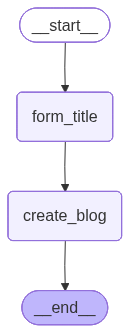

In [11]:
graph = StateGraph(BlogState)

#add nodes
graph.add_node('form_title',title_creation)
graph.add_node('create_blog',create_blog)

#add edges
graph.add_edge(START,'form_title')
graph.add_edge('form_title','create_blog')
graph.add_edge('create_blog',END)

workflow = graph.compile()
workflow


In [13]:
inital_state = {'topic':"Rise of AI in India"}
final_state = workflow.invoke(inital_state)
print(final_state['title'])

**"AI Ascendant: Charting the Rapid Growth and Impact of Artificial Intelligence in India"**


In [ ]:
print(final_state['content'])

India’s AI landscape is soaring, driven by a confluence of ambitious government policies, a burgeoning startup ecosystem, and massive data resources. Since 2020, AI‑related investments have surged past $10 billion, while the country now hosts over 2,500 AI‑focused startups—ranking it among the world’s top five hubs for AI innovation. Flagship initiatives such as the National AI Strategy (2021), the launch of the Centre for Excellence in AI, and the AI‑enabled “Digital India” programs are catalyzing adoption across sectors ranging from healthcare (AI‑driven diagnostics and tele‑medicine) and agriculture (precision farming and crop‑yield forecasting) to finance (fraud detection, credit scoring) and public services (smart city management, predictive policing). The talent pipeline is expanding rapidly, with more than 150,000 AI‑skilled graduates emerging annually from premier institutes and industry‑led bootcamps. Yet challenges remain—data privacy concerns, regulatory lag, and the need fo